In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import mode
import seaborn as sns

In [2]:
df = pd.read_csv('/users/farhan/downloads/Ritz_Jager_Data.csv')
dictionary = pd.read_excel('/users/farhan/downloads/data_dictionary_Ritz_Jager.xlsx')

In [3]:
pd.set_option('display.max_column',32)
pd.set_option('display.max_row', 50)
pd.options.display.max_colwidth = 500
df.head()

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_type,country_origin,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [4]:
dictionary.rename(columns = {'Column Name':'Column_Name'}, inplace = True )
dictionary.set_index('Column_Name',inplace=True)
dictionary.sort_index(inplace= True)
dictionary

,Definition
Column_Name,
adr,Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
adults,Number of adults
agent_ID,The ID of the travel agency that made the booking
arrival_date_day_of_month,Day of arrival date
arrival_date_month,The month of arrival date
arrival_date_week_number,Week number of year for arrival date
arrival_date_year,Year of arrival date
assigned_room_type,Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
babies,Number of babies


# Check Percentage of Null Values

In [5]:
df.isnull().sum()/len(df)*100

hotel_type                         0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal_type                          0.000000
country_origin                     0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

### There are missing values in : children, country_origin, agent and company

# Cleaning

#####  Children

In [6]:
## Check the Data Type
print('The Data Type is :',df['children'].dtype)

## Check the amount of missing values
print('Amount of missing values:',df['children'].isnull().sum())
print('Percentage of missing values:',df['children'].isnull().sum()/len(df)*100)

The Data Type is : float64
Amount of missing values: 4
Percentage of missing values: 0.003350364352123293


In [7]:
## Fill in with the mode because data is categorical, and the amount is very small
df['children'].fillna(mode(df['children']), inplace = True)

## Change the data type to int, because there is no possible decimal in amount of children
df['children'] = df['children'].astype(int)

In [8]:
## Quick check of amounts for possible outliers
df['children'].value_counts()

0     110800
1       4861
2       3652
3         76
10         1
Name: children, dtype: int64

In [9]:
## Quick analyze to determine the option for taking actions
df[df['children'] == 10]
## The possibility to have 10 children is acceptable. Booking a resort for 10 children for 14 days.
##therefore value is not count as an outlier and there is no need to take any further actions

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_type,country_origin,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
328,Resort Hotel,1,55,2015,July,29,12,4,10,2,10,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,2,No Deposit,8.0,NaN,0,Contract,133.16,0,1,No-Show,12/7/2015


##### Country Origin

In [10]:
## Check the Data Type
print('The Data Type is :',df['country_origin'].dtype)

## Check the amount of missing values
print('Amount of missing values:',df['country_origin'].isnull().sum())
print('Percentage of missing values:',df['country_origin'].isnull().sum()/len(df)*100)



The Data Type is : object
Amount of missing values: 488
Percentage of missing values: 0.40874445095904177


In [11]:
## Fill in with the mode because data is categorical, and the amount is very small
df['country_origin'].fillna(mode(df['country_origin']), inplace = True)

## No need to check outliers

#####  Agent

In [12]:
## Check the Data Type
print('The Data Type is :',df['agent'].dtype)

## Check the amount of missing values
print('Amount of missing values:',df['agent'].isnull().sum())
print('Percentage of missing values:',df['agent'].isnull().sum()/len(df)*100)

The Data Type is : float64
Amount of missing values: 16340
Percentage of missing values: 13.686238378423655


In [13]:
## Check for the total of agent listed
print('Total Agent: ',df['agent'].nunique())

## Since this column is a representation of an ID, and the amount of total agent is big:
## agent NaN values should be ignored for now

Total Agent:  333


##### company

In [14]:
## Check the Data Type
print('The Data Type is :',df['company'].dtype)

## Check the amount of missing values
print('Amount of missing values:',df['company'].isnull().sum())
print('Percentage of missing values:',df['company'].isnull().sum()/len(df)*100)

The Data Type is : float64
Amount of missing values: 112593
Percentage of missing values: 94.30689337465449


In [15]:
## the column more likely to be dropped due its null values is more than 90%
df.drop(columns = 'company', inplace = True)

# Where do the guests come from?

In [16]:
## Create a dataset where booking is NOT CANCELED
booking_success = (df['is_canceled'] == 0)
df_booking = df.loc[booking_success]

## Checks if the unsuccessfull booking has more country origin
print('The total number of guest country origin (successfull booking):',df_booking['country_origin'].nunique())
print('The total number of guest country origin (unsuccessfull):',df['country_origin'].nunique())

The total number of guest country origin (successfull booking): 165
The total number of guest country origin (unsuccessfull): 177


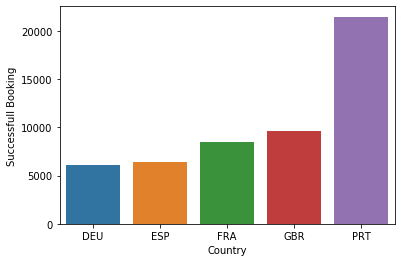

In [118]:
## Visualization
country_y = df_booking['country_origin'].value_counts().nlargest(5).sort_index()
country_x = df_booking['country_origin'].value_counts().nlargest(5).index[0:5].to_numpy()


sns.barplot(np.sort(country_x),country_y)
plt.xlabel("Country")
plt.ylabel("Successfull Booking");

# How much do guests pay for a room per night?

In [121]:
## Create a new data frame for confirmed payment & booking
## the canceled booking is NOT COUNTED 
## Check for a free payment / minus payment because they DO NOT PAY
payment = (df_booking['adr'] > 0)
df_payment = df_booking.loc[payment]

Skewness of adr is : 1.1839896701156187


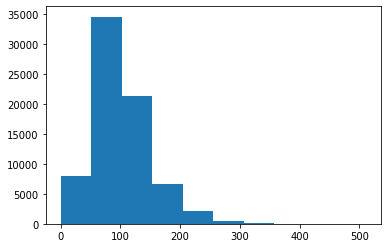

In [388]:
## checking the distribution & Skewness of adr
plt.hist(df_payment['adr'])
print('Skewness of adr is :',df_payment['adr'].skew())

In [384]:
# Since adr column has already divide the transaction by the total number of staying nights, we can conclude that
### 1. the mean of adr represent the average payment of all customer payment
### 2. Because of the non normal distribution, the mean is NOT VALID to represent the average payment of all customer payment
### 3. Outliers have to be treated by a certain actions

In [385]:
## Check for outliers
def OutlierCheck(Column):
    Q1 = Column.quantile(0.25)
    Q3 = Column.quantile(0.75)
    IQR = Q3- Q1
    
    LCL = Q1 - (1.5*IQR)
    UCL = Q3 + (1.5*IQR)
    return (LCL, UCL)

## Check the outliers 
print('Minimum Value Point is: ',OutlierCheck(df_payment['adr'])[0])
print('Maximum Value Point is: ',OutlierCheck(df_payment['adr'])[1])
print('Amount of data above the maximum point: ',len(df_payment[df_payment['adr'] > 210]))
print('Percentage of data above the maximum point: ',len(df_payment[df_payment['adr'] > 210]) / len(df_payment['adr']) * 100)

Minimum Value Point is:  -14.0
Maximum Value Point is:  210.0
Amount of data above the maximum point:  2385
Percentage of data above the maximum point:  3.248477914436317


In [398]:
## Since 2300+ data / 3% of the data point exceeds the maximum cap, the best practice is to replace them to the maximum cap
df_payment.loc[df['adr'] > 210, 'adr'] = 210

Skewness of adr is : 0.6880692096343425


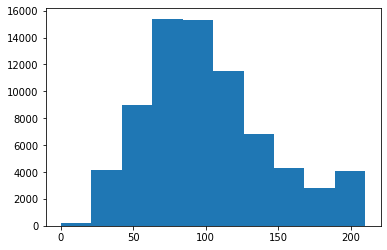

In [401]:
## checking the distribution & Skewness of adr
plt.hist(df_payment['adr'])
print('Skewness of adr is :',df_payment['adr'].skew())

In [403]:
## Since the distribution is becoming normalized, now we can compute the mean with a more valid result
df_payment['adr'].mean()

101.18324411936675

# How does the price per night vary over the year?

In [122]:
## use the successfull booking, payment value > 0, cleaned dataset
yearly_group = df_payment.groupby('arrival_date_year')
yearly_group['adr'].mean()

arrival_date_year
2015     92.153138
2016     98.758826
2017    113.144967
Name: adr, dtype: float64

In [136]:
price_overyear = pd.DataFrame(yearly_group['adr'].mean())
price_overyear.reset_index(inplace=True)
price_overyear

,arrival_date_year,adr
0,2015,92.153138
1,2016,98.758826
2,2017,113.144967


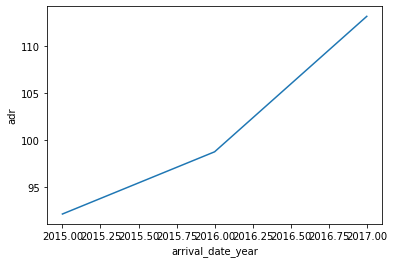

In [137]:
sns.lineplot(x='arrival_date_year', y='adr', data=price_overyear)

#  Which are the busiest months?

In [231]:
# Use the successfull booking dataset and count the total of booking per month in each year
year_group = df_booking.groupby('arrival_date_year')
year_group['arrival_date_month'].max()

arrival_date_year
2015    September
2016    September
2017          May
Name: arrival_date_month, dtype: object

In [322]:
## ANOTHER point of view is to calculate its mean value divided by its total amount of time the month appeared in the dataset
## because the SUM OF MONTH IS DIFFERENT IN EACH YEAR
year_group['arrival_date_month'].value_counts()

arrival_date_year  arrival_date_month
2015               October               3225
                   September             3020
                   August                2291
                   December              1947
                   November              1854
                   July                  1517
2016               October               3689
                   May                   3563
                   September             3372
                   April                 3367
                   March                 3347
                   August                3238
                   June                  3196
                   July                  3073
                   November              2818
                   February              2554
                   December              2462
                   January               1691
2017               May                   3551
                   July                  3329
                   March                 3

In [342]:
## Total the booked made in all the dataset per month
total_booked = df_booking['arrival_date_month'].value_counts()

## Create a new data frame with a sorted index
number3_df = pd.DataFrame(total_booked).sort_index()

## Create a list containing the number times each month appeared in the data set yearly
month_times = [2,3,2,2,2,3,2,2,2,2,2,2]

## Insert it to the data frame
number3_df['month'] = month_times

## Create a column to calculate monthly average booking based on the number of times the month appeared in each year
number3_df['monthly_average_booking'] = number3_df['arrival_date_month'] / number3_df['month']

In [346]:
number3_df.sort_values(by='monthly_average_booking', ascending = False)

,arrival_date_month,month,monthly_average_booking
May,7114,2,3557.000000
October,6914,2,3457.000000
March,6645,2,3322.500000
April,6565,2,3282.500000
June,6404,2,3202.000000
September,6392,2,3196.000000
August,8638,3,2879.333333
February,5372,2,2686.000000
July,7919,3,2639.666667
November,4672,2,2336.000000


# How long do people stay at the hotels?

In [432]:
## use successfull booking dataset only
## create a dataset
number4_df = pd.concat([df_booking['hotel_type'],df_booking['stays_in_week_nights'],df_booking['stays_in_weekend_nights']], axis = 'columns')
number4_df['total'] = number4_df['stays_in_week_nights'] + number4_df['stays_in_weekend_nights']

## differ for each hotel type
resort_only = (number4_df['hotel_type'] == 'Resort Hotel')
number4_resort = number4_df.loc[resort_only]

City_only = (number4_df['hotel_type'] == 'City Hotel')
number4_city = number4_df.loc[City_only]

In [433]:
##show the dataframe
number4_df

,hotel_type,stays_in_week_nights,stays_in_weekend_nights,total
0,Resort Hotel,0,0,0
1,Resort Hotel,0,0,0
2,Resort Hotel,1,0,1
3,Resort Hotel,1,0,1
4,Resort Hotel,2,0,2
...,...,...,...,...
119385,City Hotel,5,2,7
119386,City Hotel,5,2,7
119387,City Hotel,5,2,7
119388,City Hotel,5,2,7


Skewness for total is: 3.1958456698951943


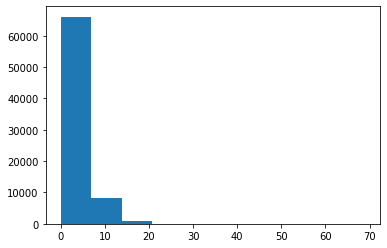

In [410]:
## Check for the distribution & skewness level of total
plt.hist(number4_df['total'])
print('Skewness for total is:',number4_df['total'].skew())

In [418]:
# The data distribution conclude that
### 1. Because of the non normal distribution, the mean is NOT VALID to represent the average time people stay hotel
### 3. Outliers have to be treated by a certain actions

In [419]:
## Check for outliers USING THE OutlierCheck Function (Code on Number 2)
print('Minimum Value Point is: ',OutlierCheck(number4_df['total'])[0])
print('Maximum Value Point is: ',OutlierCheck(number4_df['total'])[1])
print('Amount of data above the maximum point: ',len(number4_df[number4_df['total'] > 7]))
print('Percentage of data above the maximum point: ',len(number4_df[number4_df['total'] > 7]) / len(number4_df['total']) * 100)

Minimum Value Point is:  -1.0
Maximum Value Point is:  7.0
Amount of data above the maximum point:  3378
Percentage of data above the maximum point:  4.494053162334034


In [422]:
## Since 3300+ data / 4,4% of the data point exceeds the maximum cap, the best practice is to replace them to the maximum cap
number4_df.loc[number4_df['total'] > 7, 'total'] = 7

Skewness of adr is : 0.6742643620375397


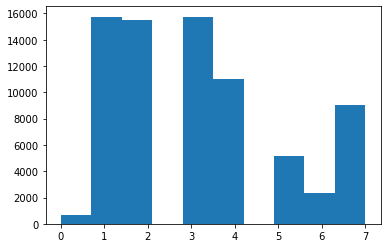

In [423]:
## checking the distribution & Skewness of total
plt.hist(number4_df['total'])
print('Skewness of adr is :',number4_df['total'].skew())

In [424]:
## Since the distribution is becoming normalized, now we can compute the mean with a more valid result
print('The average staying night for people to stay at the hotels is:', number4_df['total'].mean())
print('The average staying night for people to stay at the city hotel is:', number4_city['total'].mean())
print('The average staying night for people to stay at the resort hotel is:', number4_resort['total'].mean())

The average staying night for people to stay at the hotels is: 3.2058244419019237
The average staying night for people to stay at the city hotel is: 2.9236177208618153
The average staying night for people to stay at the resort hotel is: 4.142891699495473


# Bookings by market segment

In [368]:
## use successfull booking dataset
df_booking['market_segment'].value_counts()

Online TA        35738
Offline TA/TO    15908
Direct           10672
Groups            7714
Corporate         4303
Complementary      646
Aviation           185
Name: market_segment, dtype: int64

In [140]:
### VISUALIZATION
booking_segment = pd.DataFrame(df_booking['market_segment'].value_counts())
booking_segment.reset_index(inplace=True)
booking_segment

,index,market_segment
0,Online TA,35738
1,Offline TA/TO,15908
2,Direct,10672
3,Groups,7714
4,Corporate,4303
5,Complementary,646
6,Aviation,185


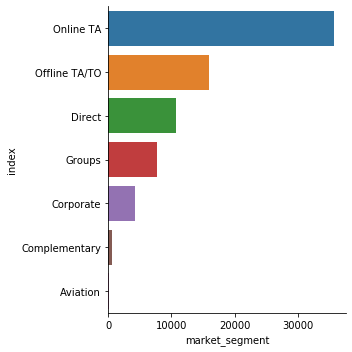

In [142]:
### VISUALIZATION
sns.catplot(x="market_segment",y="index",kind='bar',data=booking_segment)

# How many bookings were cancelled?

In [145]:
## use full dataset
canceled = (df['is_canceled'] == 1)
print('There are a total of: {} bookings canceled'.format(df[canceled].shape[0]))

There are a total of: 44224 bookings canceled


In [151]:
## use full dataset
df.loc[canceled].groupby('arrival_date_year')['is_canceled'].value_counts()

arrival_date_year  is_canceled
2015               1               8142
2016               1              20337
2017               1              15745
Name: is_canceled, dtype: int64

# Which month has the highest number of cancellations?

In [444]:
## Total the booked made in all the dataset per month
total_canceled = df.loc[canceled,'arrival_date_month'].value_counts()

## Create a new data frame with a sorted index
number_last = pd.DataFrame(total_canceled).sort_index()

## Create a list containing the number times each month appeared in the data set yearly
month_times = [2,3,2,2,2,3,2,2,2,2,2,2]

## Insert it to the data frame
number_last['month'] = month_times

## Create a column to calculate monthly average booking based on the number of times the month appeared in each year
number_last['monthly_average_cancelation'] = number_last['arrival_date_month'] / number_last['month']

In [449]:
number_last.sort_values(by='monthly_average_cancelation', ascending = False)

,arrival_date_month,month,monthly_average_cancelation
May,4677,2,2338.500000
June,4535,2,2267.500000
April,4524,2,2262.000000
October,4246,2,2123.000000
September,4116,2,2058.000000
August,5239,3,1746.333333
July,4742,3,1580.666667
March,3149,2,1574.500000
February,2696,2,1348.000000
December,2371,2,1185.500000
